In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from tabulate import tabulate
import matplotlib
matplotlib.rcParams['font.family'] = 'FreeSans'


print(f'cpu_count: {os.cpu_count()}')

# data_path = '../Dataset_Cleaned/'
model_path = '../04_Model_Saved/'
if os.path.exists(os.path.abspath(model_path)):
    print(f"{os.path.abspath(model_path)} exists.")
else:
    print(f"{os.path.abspath(model_path)} does not exist.")

cpu_count: 72
/nethome/home3/yuxiang.wu/CCA_CALPHAD_SSS_ML/CCA_representation_ML/04_Model_Saved exists.


### Reading excel files exported from BO in subdirectories


In [40]:
def is_expected_format(filename):
    return filename.startswith('hypertable_NN_full_v3_BO_') and filename.endswith('.xlsx')


def read_excel_file(filepath, dfs):
    df = pd.read_excel(filepath)
    dfs.append(df)


hypertable_list = []

# iterate through all the numbers from 1 to 10
for i in range(1, 11):
    filename = f'hypertable_NN_full_v3_BO_{i}.xlsx'

    # print(filename)

    # Iterate through all subdirectories and files in the parent folder
    for root, dirs, files in os.walk(model_path):
        # Check if the file matches the expected format
        if is_expected_format(filename):
            if filename in files:
                filepath = os.path.join(root, filename)
                print(filename)
                read_excel_file(filepath, hypertable_list)

hypertable_NN_full_v3_BO_1.xlsx
hypertable_NN_full_v3_BO_2.xlsx
hypertable_NN_full_v3_BO_3.xlsx
hypertable_NN_full_v3_BO_4.xlsx
hypertable_NN_full_v3_BO_5.xlsx
hypertable_NN_full_v3_BO_6.xlsx
hypertable_NN_full_v3_BO_7.xlsx
hypertable_NN_full_v3_BO_8.xlsx
hypertable_NN_full_v3_BO_9.xlsx
hypertable_NN_full_v3_BO_10.xlsx


In [41]:
display(hypertable_list[0].head())

,score_r2_HC,score_r2_HC_best,score_loss_HC,score_r2_H,score_r2_C,score_loss_H,score_loss_C,NNS_num_nodes,NNS_num_layers,NNH_num_nodes,NNH_num_layers,NNC_num_nodes,NNC_num_layers,NNS_dropout,NNH_NNC_dropout,loss_encoder,learning_rate_H,learning_rate_C,batch_size_H,N_epochs_local
0,0.723995,0.723995,0.341411,0.696293,0.751696,0.366259,0.316563,91,2,32,3,37,2,0.174504,0.238224,0,0.000585,0.000477,27,2
1,0.644327,0.723995,0.487712,0.612191,0.676464,0.527970,0.447454,84,1,39,3,38,4,0.355440,0.328233,1,0.000128,0.000340,23,2
2,0.642058,0.723995,0.470174,0.607277,0.676839,0.504222,0.436127,99,2,44,6,64,6,0.461499,0.392219,0,0.000251,0.000421,19,4
3,0.717581,0.723995,0.349177,0.712105,0.723057,0.334763,0.363592,104,1,56,3,47,5,0.136759,0.265828,0,0.000940,0.000218,26,2
4,0.711907,0.723995,0.353605,0.688315,0.735499,0.365632,0.341577,68,2,48,4,36,4,0.315073,0.111118,0,0.000742,0.000652,23,1


### plot ensembling of BO search


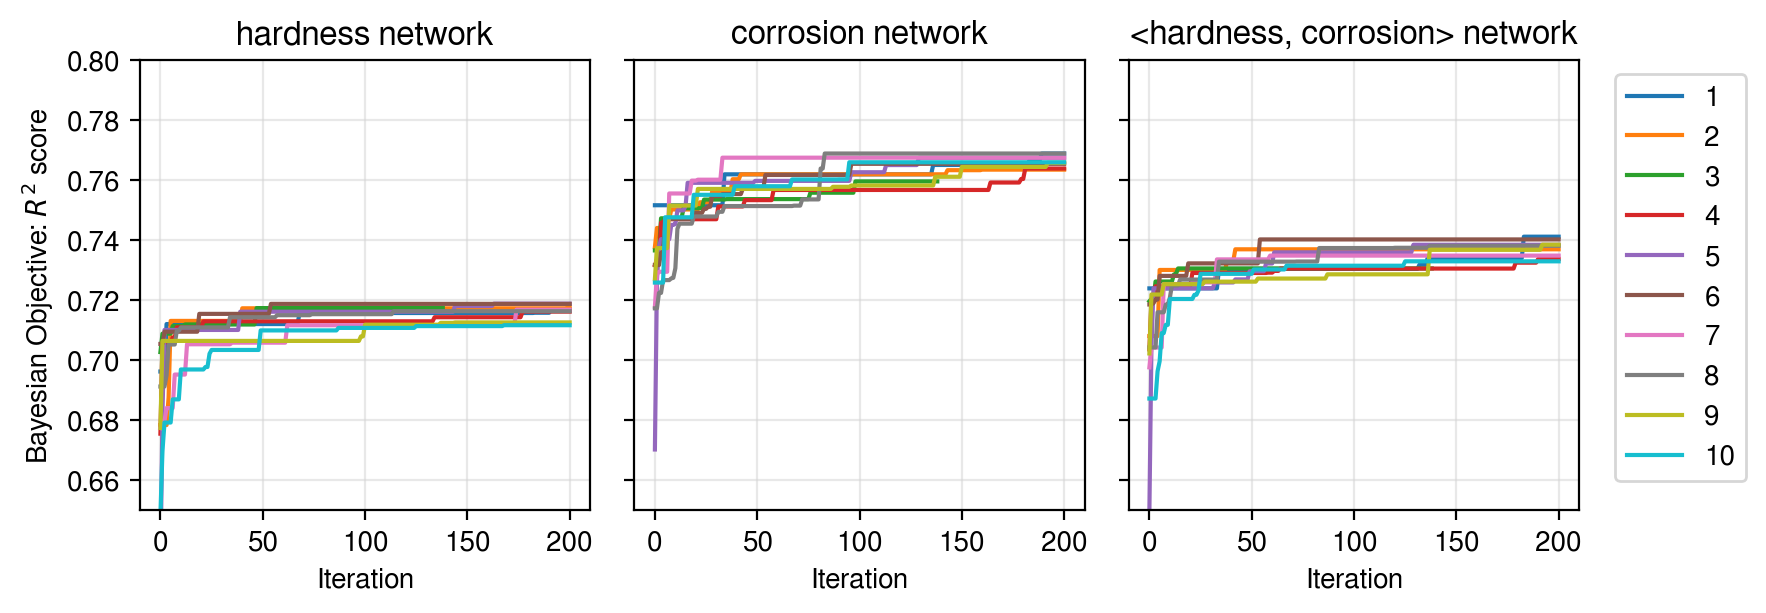

In [42]:
import numpy as np
import matplotlib.pyplot as plt


def plot_best_r2_score(ax, col_name, title_name, hypertable, legend_label=None, set_ylabel=False):
    data = hypertable[col_name].values
    best_scores = np.maximum.accumulate(data)
    ax.plot(best_scores, label=legend_label, linestyle='-', alpha=1)
    ax.set_title(title_name)
    ax.set_xlabel('Iteration')

    if set_ylabel:
        ax.set_ylabel(r'Bayesian Objective: $R^2$ score')

    ax.set_ylim([0.65, 0.8])
    ax.grid(alpha=0.5, color='lightgrey')
    ax.set_box_aspect(1)

    if legend_label is not None:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(
    9, 3), sharex=True, sharey=True, dpi=200)

for i in range(0, 10):

    hypertable = hypertable_list[i]
    bo_ens_num = i + 1

    # Call the function for each column and subplot
    col_names = ['score_r2_H', 'score_r2_C', 'score_r2_HC']
    title_names = ['hardness network', 'corrosion network',
                   '<hardness, corrosion> network']
    for j, (ax, col_name, title_name) in enumerate(zip(axs, col_names, title_names)):
        legend_label = f'{bo_ens_num}' if j == 2 else None
        plot_best_r2_score(ax, col_name, title_name, hypertable,
                           legend_label, set_ylabel=(j == 0))

# Add a title to the figure
# fig.suptitle(f'Best R2 Scores')

# Add a legend outside the data box for the last subplot
axs[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a file
plt.savefig(model_path + 'v3_BO_score_r2_individual.pdf')
fig.tight_layout()
plt.show()

In [43]:
# # Create a figure with a single subplot
# fig, axs = plt.subplots(1, 1, figsize=(
#     8, 3), sharex=True, sharey=True, dpi=200)

# # Plot the data for each BO ensemble on the same subplot
# for i in range(0, 10):
#     hypertable = hypertable_list[i]
#     bo_ens_num = i+1

#     legend_label = f'{bo_ens_num}'

#     axs.scatter(hypertable_list[i]['NNF_num_layers'], hypertable_list[i]
#                 ['score_r2_HC'], label=legend_label, alpha=0.3)

# # Set the axis labels, grid, and box aspect
# axs.set_xlabel('Shared network hidden layers', fontsize=12)
# axs.set_ylabel('Bayesian Objective: R2 score', fontsize=12)
# axs.set_ylim([0.6, 0.8])
# axs.grid(alpha=0.5, color='lightgrey')
# axs.set_box_aspect(1)
# # axs.tick_params(axis='both', which='major', labelsize = 12)  # Set size of x and y axis numbers (ticks)
# axs.set_title('Hardness+Corrosion network', fontsize=12)


# # Create a legend outside the data box for the last subplot
# legend = axs.legend(bbox_to_anchor=(1.06, 1.06), loc='upper left')

# # Add annotation text next to the legend, rotated and aligned vertically on the left side of the legend
# axs.text(1.03, 0.5, 'Ensemble of Bayesian Optimization',
#          fontsize=8,
#          transform=axs.transAxes,
#          rotation=90,
#          verticalalignment='center',
#          horizontalalignment='left')


# # Save and show the figure
# fig.tight_layout()
# plt.savefig(model_path+'v3_BO_score_r2 vs. NNF_num_layers.png')
# plt.show()

### plot the mean+std of BO search ensembling


In [44]:
# Define a function to pad the arrays
def pad_array(array):
    if len(array) <= 210:
        array = np.maximum.accumulate(array)
        max_value = np.max(array)
        padding_length = 210 - len(array)
        array = np.pad(array, (0, padding_length),
                       mode='constant', constant_values=max_value)
    return array


# Apply the function to the three lists of arrays
score_r2_HC_padded = [
    pad_array(hypertable_list[i]['score_r2_HC'].values) for i in range(10)]
score_r2_H_padded = [
    pad_array(hypertable_list[i]['score_r2_H'].values) for i in range(10)]
score_r2_C_padded = [
    pad_array(hypertable_list[i]['score_r2_C'].values) for i in range(10)]

# Compute the mean and standard deviation of the padded arrays
mean_score_r2_HC = np.mean(score_r2_HC_padded, axis=0)
std_score_r2_HC = np.std(score_r2_HC_padded, axis=0)
mean_score_r2_H = np.mean(score_r2_H_padded, axis=0)
std_score_r2_H = np.std(score_r2_H_padded, axis=0)
mean_score_r2_C = np.mean(score_r2_C_padded, axis=0)
std_score_r2_C = np.std(score_r2_C_padded, axis=0)

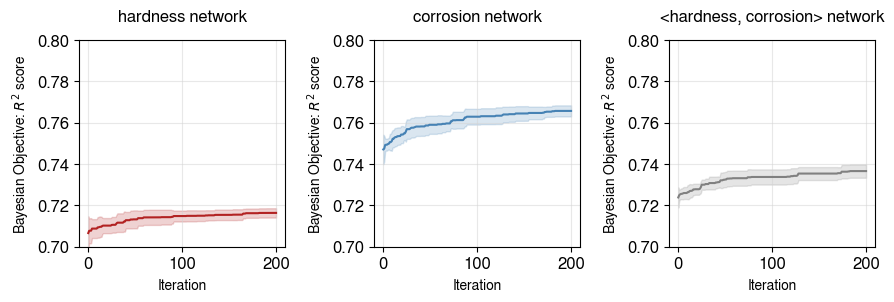

In [45]:
# Define a function to plot the best R2 score for a given column name
def plot_best_avg_r2_score(ax, col_name, mean_score_r2, std_score_r2, color):
    ax.plot(mean_score_r2, color=color)
    ax.fill_between(np.arange(mean_score_r2.shape[0]),
                    mean_score_r2-std_score_r2, mean_score_r2+std_score_r2, color=color, alpha=0.2)
    # You can also set font size for the title.
    ax.set_title(col_name, fontsize=12, y=1.05)
    ax.set_xlabel('Iteration', fontsize=10)
    ax.set_ylabel(r'Bayesian Objective: $R^2$ score', fontsize=10)
    ax.set_ylim([0.7, 0.8])
    ax.grid(alpha=0.5, color='lightgrey')
    ax.set_box_aspect(1)
    # Set size of x and y axis numbers (ticks)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.legend()


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=False)

# Call the function for each column and subplot
col_names = ['hardness network', 'corrosion network',
             '<hardness, corrosion> network']
colors = ['firebrick', 'steelblue', 'grey']
mean_score_r2_list = [mean_score_r2_H[9:],
                      mean_score_r2_C[9:], mean_score_r2_HC[9:]]
std_score_r2_list = [std_score_r2_H[9:],
                     std_score_r2_C[9:],  std_score_r2_HC[9:]]

for ax, col_name, mean_score_r2, std_score_r2, color in zip(axs, col_names, mean_score_r2_list, std_score_r2_list, colors):
    plot_best_avg_r2_score(ax, col_name, mean_score_r2, std_score_r2, color)

fig.tight_layout()
# plt.savefig(model_path+'v3_BO_score_r2_AVG.pdf')  # Save the plot as a file
plt.show()